## <center>Quantile transform</center>

Numerical input variables may have a highly skewed or non-standard distribution. This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more. Many machine learning algorithms prefer or perform better when numerical input variables and even output variables in the case of regression have a standard probability distribution, such as a Gaussian (normal) or a uniform distribution. The quantile transform provides an automatic way to transform a numeric input variable to have a different data distribution, which in turn, can be used as input to a predictive model.

Many machine learning algorithms perform better when the distribution of variables is Gaussian. Recall that the observations for each variable may be thought to be drawn from a probability distribution. The Gaussian is a common distribution with the familiar bell shape. It is so common that it is often referred to as the “normal” distribution.

Some algorithms, like linear regression and logistic regression, explicitly assume the real-valued variables have a Gaussian distribution. Other nonlinear algorithms may not have this assumption, yet often perform better when variables have a Gaussian distribution. This applies both to real-valued input variables in the case of classification and regression tasks, and real-valued target variables in the case of regression tasks.

Some input variables may have a highly skewed distribution, such as an exponential distribution where the most common observations are bunched together. Some input variables may have outliers that cause the distribution to be highly spread. These concerns and others, like non-standard distributions and multi-modal distributions, can make a dataset challenging to model with a range of machine learning models. As such, it is often desirable to transform each input variable to have a standard probability distribution, such as a Gaussian (normal) distribution or a uniform distribution.

A quantile transform will map a variable’s probability distribution to another probability distribution. Recall that a quantile function, also called a percent-point function (PPF), is the inverse of the cumulative probability distribution (CDF). A CDF is a function that returns the probability of a value at or below a given value. The PPF is the inverse of this function and returns the value at or below a given probability.

The quantile function ranks or smooths out the relationship between observations and can be mapped onto other distributions, such as the uniform or normal distribution. The transformation can be applied to each numeric input variable in the training dataset and then provided as input to a machine learning model to learn a predictive modeling task. This quantile transform is available in the scikit-learn Python machine learning library via the QuantileTransformer class. The class has an “output_distribution” argument that can be set to “uniform” or “normal” and defaults to “uniform“.
It also provides a “n_quantiles” that determines the resolution of the mapping or ranking of the observations in the dataset. This must be set to a value less than the number of observations in the dataset and defaults to 1,000.

We can demonstrate the QuantileTransformer with a small worked example. We can generate a sample of random Gaussian numbers and impose a skew on the distribution by calculating the exponent. The QuantileTransformer can then be used to transform the dataset to be another distribution, in this cases back to a Gaussian distribution.

#### Example 1

In [1]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

In [2]:
# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution
data = exp(data)

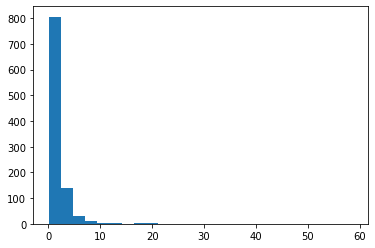

In [3]:
# histogram of the raw data with a skew
plt.hist(data, bins=25);

In [4]:
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)

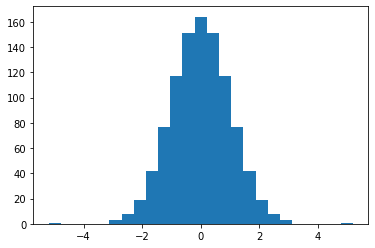

In [5]:
# histogram of the transformed data
plt.hist(data_trans, bins=25);

#### Example 2

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=42)

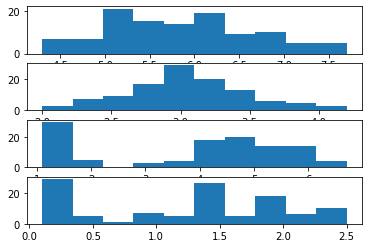

In [8]:
fig, ax = plt.subplots(nrows=X_train.shape[1])
for i in range(X_train.shape[1]):
    ax[i].hist(X_train[:, i])

Features 3 and 4 don't seem to have a good distribution. In this case, a uniform distribution transformation could be used.

In [9]:
quantile_uni = QuantileTransformer(output_distribution='uniform')
X_train[:, [2,3]] = quantile_uni.fit_transform(X_train[:, [2,3]])

X_test[:, [2,3]] = quantile_uni.transform(X_test[:, [2,3]])



c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


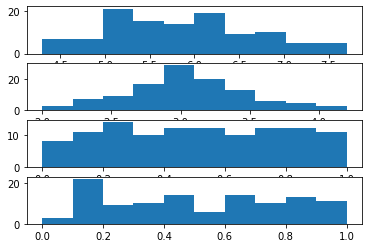

In [10]:
fig, ax = plt.subplots(nrows=X_train.shape[1])
for i in range(X_train.shape[1]):
    ax[i].hist(X_train[:, i])